# Instituto Tecnológico de Costa Rica

## Programa de Ciencia de los Datos

##### Curso: Big Data


### Proyecto Final - II Parte

#### Objetivo:  Machine Learning con datos en PostgreSQL.

Estudiantes:

         Claudia Alcazar Urena

         Natalia Rojas Canales

Profesor:

            MsC. Felipe Meza

Lunes 09 de Setiembre de 2019

#### DESCRIPCION PROYECTO - PARTE II


Seleccionar un set de datos de su preferencia, que no corresponda a un conjunto trivial, haciendo uso de PostgreSQL y la librería MLlib llevar a cabo un análisis predictivo o clasificatorio, que resuelva algún problema en el conjunto de datos seleccionado.

ENTREGABLE: Una notebook con los resultados obtenidos.


## DESCRIPCION DEL TRABAJO A REALIZAR PARA LOS DATOS

### PASO 1 - Selección de ámbito de trabajo
Posterior a la revisión de dataset como:

Muertes accidentales
 df = pd.read_csv('https://raw.githubusercontent.com/NataliaGRC/DataScience/master/pruebaConcepto.csv') 

Muertes accidentales con detalle de causa de muerte
df = pd.read_csv('https://raw.githubusercontent.com/NataliaGRC/DataScience/master/pruebaConcepto2.csv')

Precios de diamantes que usamos en el proyecto de Machine Learning
dfDiamantes = pd.read_csv('https://raw.githubusercontent.com/NataliaGRC/DataScience/master/diamonds.csv')

Accidentes donde mediaban drogras, año 2008
dfDeadDrugs = pd.read_csv('https://raw.githubusercontent.com/NataliaGRC/DataScience/master/Accidental_Drug_Related_Deaths_2012-2018.csv')

Muertes accidentales donde se involucraban oficiales
dfPolice = pd.read_csv('https://raw.githubusercontent.com/NataliaGRC/DataScience/master/CMPD_OfficerInvolved_Prueba.csv')

Precios de casa de inglaterra
dfHouse = pd.read_csv('https://raw.githubusercontent.com/NataliaGRC/DataScience/master/HouseTest.csv')

Precios de casa en Detroit
df = pd.read_csv('https://raw.githubusercontent.com/NataliaGRC/DataScience/master/housepricePruebaDetroit.csv')

Precios de casa en Melboune
df = pd.read_csv('https://raw.githubusercontent.com/NataliaGRC/DataScience/master/PruebaCasasMelboune.csv')

Precios de casa de bajo costo  en Melboune
df = pd.read_csv('https://raw.githubusercontent.com/NataliaGRC/DataScience/master/MELBOURNE_HOUSE_PRICES_LESS.csv')

Crimenes donde había presencia de drogas
df = pd.read_csv('https://raw.githubusercontent.com/NataliaGRC/DataScience/master/crimelabaccidentaldrugdeathsextract2008.csv')
 

#### Decisión:  precio de venta de casas en Melbourne

### Explicación del DATASET

Origen de datos: https://www.kaggle.com/anthonypino/melbourne-housing-market

Explicación de los datos:
- Suburb: Vecindario donde se encuentra la casa.
- Address:  Dirección de la casa.
- Rooms: número de habitaciones.
- Price: precio en dólares australianos.
- Method: S - propiedad vendida; SP - propiedad vendida anteriormente; PI: propiedad transferida; PN - vendido antes no revelado; SN - vendido no revelado; NB: sin oferta; VB - oferta del postor; W - retirado antes de la subasta; SA - vendido después de la subasta; SS - vendido después del precio de la subasta no revelado. N / A: el precio o la oferta más alta no están disponibles.
- Type: br - dormitorio (s); h - casa, cabaña, villa, semi, terraza; u - unidad, dúplex; t - casa adosada; sitio de desarrollo sitio de desarrollo; o res - otro residencial.
- SellerG: Agente de bienes raíces
- Date: Fecha de venta
- Distance: Distancia desde CBD en Kilómetros.
- Regionname: Región general (Oeste, Noroeste, Norte, Nordeste ... etc.)
- Propertycount: número de propiedades que existen en el suburbio.
- Bedroom2: número raspado de dormitorios (de otra fuente). Este termino no lo tenemos claro, porque en inglés indicaba "Scraped # of Bedrooms (from different source)", creemos que esta asociado con el terminado del material, lo más cercano que encontramos es este video que habla del metal: https://www.youtube.com/watch?v=7QOCE1-fB6Y  
- Bathroom: Cantidad de baños
- Car: capacidad de autos que pueden ingresar a la cochera.
- Landsize: tamaño de la tierra en metros.
- BuildingArea: Tamaño del edificio en metros.
- YearBuilt: Año de construcción de la casa.
- CouncilArea: Consejo de gobierno para el área, en Costa Rica sería la municipalidad a la que pertenece.
- Lattitude: Latitud.
- Longtitude: Longitud.

### Paso 2 - Análisis previo de datos
Para todos los dataset mencionados se hicieron pruebas de revisión de datos, se realizó con la misma herramienta del curso de machine learning. 


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/NataliaGRC/DataScience/master/PruebaCasasMelboune.csv')

In [3]:
df.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Unnamed: 7,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016,2.5,3067,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016,2.5,3067,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016,2.5,3067,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016,2.5,3067,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016,2.5,3067,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019
5,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,2016,2.5,3067,...,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019
6,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,2016,2.5,3067,...,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019
7,Abbotsford,99 Turner St,2,h,NaN,S,Collins,2016,2.5,3067,...,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.7996,144.9989,Northern Metropolitan,4019
8,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,2016,2.5,3067,...,1.0,0.0,181.0,NaN,NaN,Yarra City Council,-37.8041,144.9953,Northern Metropolitan,4019
9,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,2016,2.5,3067,...,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019


Se  eliminan las variables que no van a ser utilizadas en el analisis, porque no son variables que puedan aportar en el analisis, como lo son: 
    - Address
    - SellerG
    

In [4]:
del df['Address'] 
del df['SellerG'] 

In [5]:
df.head(10)

,Suburb,Rooms,Type,Price,Method,Unnamed: 7,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,2,h,NaN,SS,2016,2.5,3067,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019
1,Abbotsford,2,h,1480000.0,S,2016,2.5,3067,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019
2,Abbotsford,2,h,1035000.0,S,2016,2.5,3067,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019
3,Abbotsford,3,u,NaN,VB,2016,2.5,3067,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019
4,Abbotsford,4,h,1600000.0,VB,2016,2.5,3067,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019
5,Abbotsford,4,h,NaN,SN,2016,2.5,3067,3.0,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019
6,Abbotsford,2,h,NaN,S,2016,2.5,3067,4.0,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019
7,Abbotsford,2,h,NaN,S,2016,2.5,3067,3.0,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.7996,144.9989,Northern Metropolitan,4019
8,Abbotsford,2,h,941000.0,S,2016,2.5,3067,2.0,1.0,0.0,181.0,NaN,NaN,Yarra City Council,-37.8041,144.9953,Northern Metropolitan,4019
9,Abbotsford,3,h,1876000.0,S,2016,2.5,3067,4.0,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019


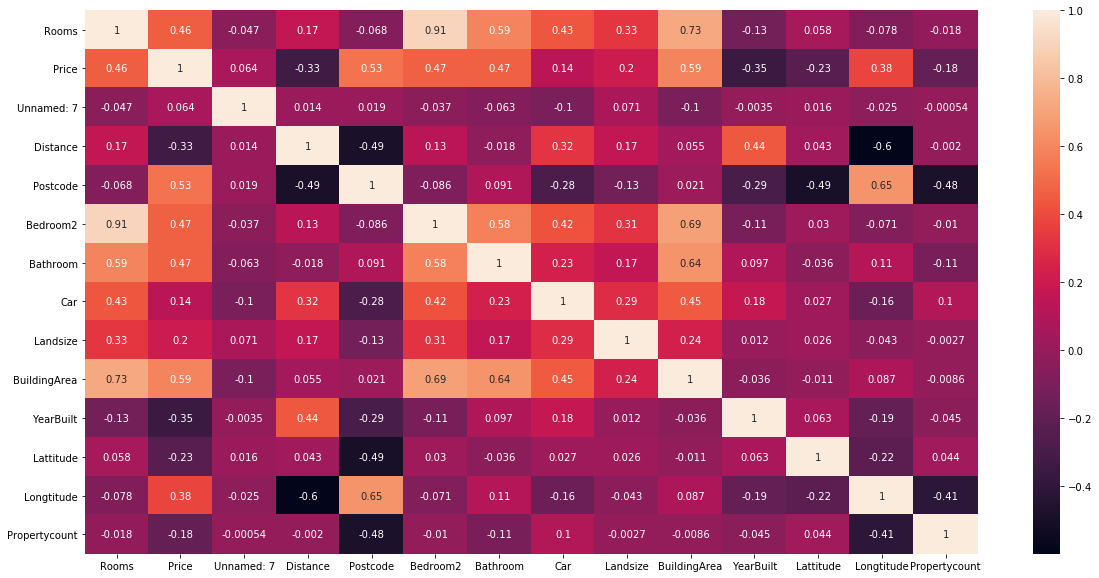

In [6]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True)

Para tomar en cuenta en el análisis los datos que no son numéricos, se realizó One-Hot Encoding sobre las variables

In [7]:
processed_data = pd.get_dummies(df, columns=['Suburb'])
processed_data = pd.get_dummies(processed_data, columns=['Type'])
 

Volvemos a analizar la correlación

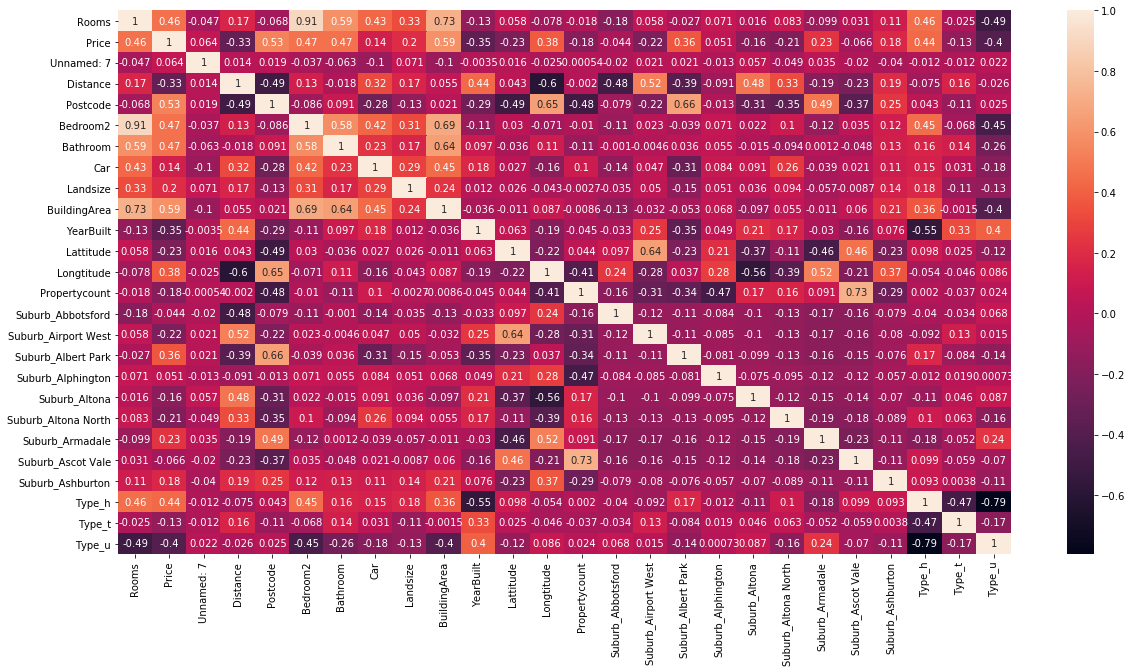

In [8]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20, 10))
sns.heatmap(processed_data.corr(), annot=True)

Podemos observar que las variables utilizadas no tienen una correlación mayor a 0 (en su mayoría) respecto al precio, de modo que se eliminarán y se agregaron otras para alizarlo de nuevo. 
Hacerlo por partes obedece a que la matriz se vuelve exageradamente grande si se hacen todas a la vez.

In [9]:
del df['Suburb'] 
del df['Type'] 
 

In [10]:
#generación de One-hot encoding 
processed_data = pd.get_dummies(df, columns=['CouncilArea'])
processed_data = pd.get_dummies(processed_data, columns=['Regionname'])

Volvemos a analizar la correlación

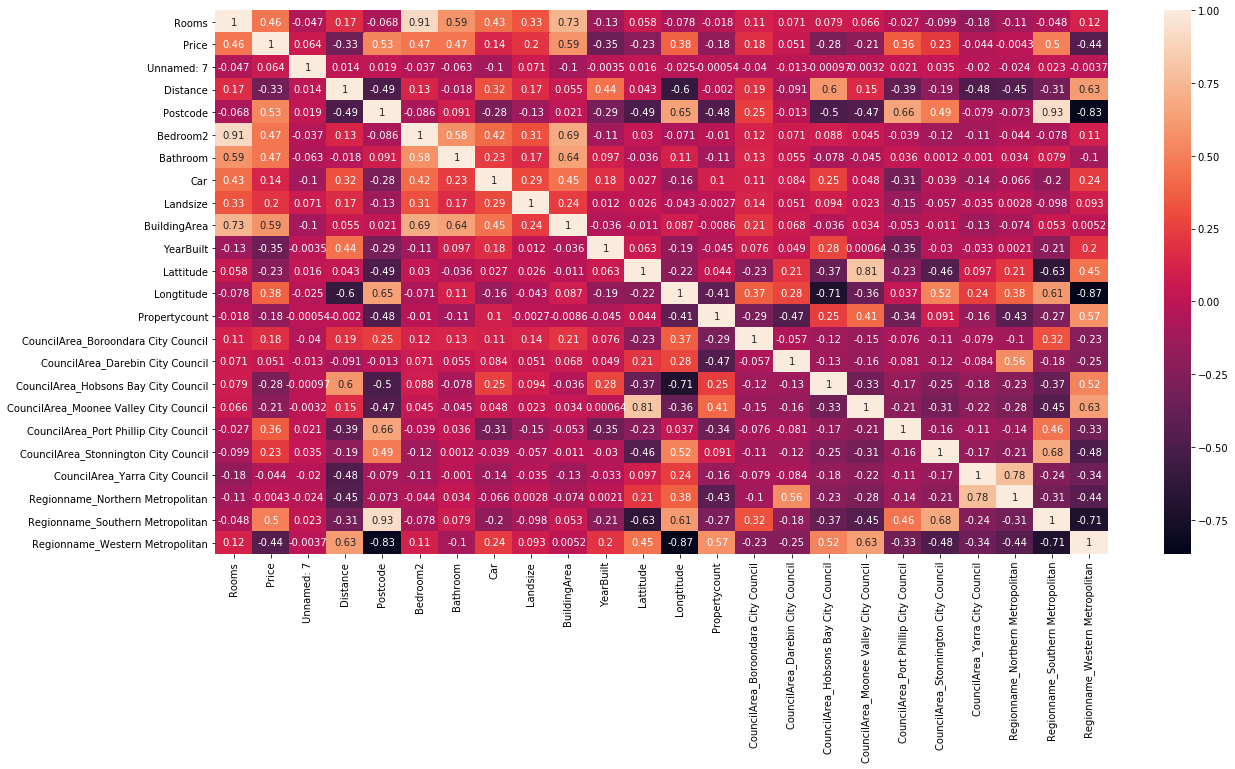

In [11]:
#desplegamos la matriz de correlacción 
plt.figure(figsize=(20, 10))
sns.heatmap(processed_data.corr(), annot=True)

Para estas otras dos variables, se observa que hay unas categorías que dan algunos datos arriba de 0, incluso hay dos que muestran 0.5, 0.23 y 0.33 pero las otras categorías no son muy positivas, de modo que se descartan.

In [12]:
del df['CouncilArea']
del df['Regionname']

Ahora volvemos a ver la matriz de correlación, para decidir cuales serán nuestras variables.

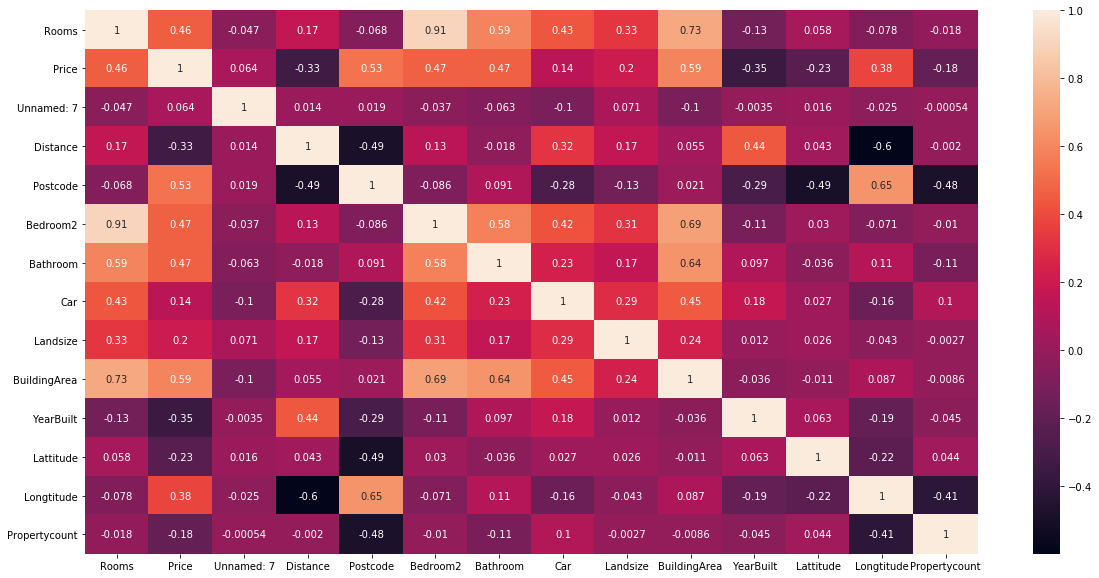

In [13]:

plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True)

Analizando los resultados: 
- Unnamed (año): porque su correlacción es 0.064 respecto a precio.
- Distance: porque es negativa -0.33
- car: porque su correlación es de 0.14
- YearBuilt: el año de construcción tiene un dince de correlación negativo de -0.35, lo cual es sumamente interesante, porque la tendencia de análisis humano podría creer que una casa nueva es más cara que una casa que fue construida hace 3 años. 
- Lattitude (-0.23) y Longitude (0.38) : aunque longitud esta mostrando un dato interesante, la longitud esta dando negativa, y no podremos hacer un analisis geoespacial, de modo que la decisión es eliminar ambos. 
- Propertycount: la correlación da negativa en -0.18, así que será eliminado.

Por lo tanto, se va a tomar para el analisis: Rooms, Postcode, Bedroom2, Bathroom, Car, Landsize, BuildingArea. 

Y nuestra variable de predicción será el precio: price: monto en dólares australianos en el cual se venderá o vendió la casa.

### PASO 3 - Preprocesado de datos

In [14]:
dfCasas = pd.read_csv('https://raw.githubusercontent.com/NataliaGRC/DataScience/master/PruebaCasasMelboune.csv')

In [15]:
dfCasas.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Unnamed: 7,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016,2.5,3067,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016,2.5,3067,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016,2.5,3067,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019


In [16]:
del dfCasas['CouncilArea']
del dfCasas['Regionname']
del dfCasas['Suburb'] 
del dfCasas['Type'] 
del dfCasas['Address'] 
del dfCasas['SellerG'] 

del dfCasas['Unnamed: 7'] 
del dfCasas['Distance']
del dfCasas['Car']
del dfCasas['YearBuilt']
del dfCasas['Lattitude']
del dfCasas['Longtitude']
del dfCasas['Propertycount']
del dfCasas['Method']

In [17]:
dfCasas = dfCasas.fillna(0)

Deberíamos de normalizar los datos, pero no se hará hasta que sean generados más datos.

In [18]:
print("Dimension de los Datos")
dfCasas.shape

Dimension de los Datos


(629, 7)

In [19]:
print("Promedio de los Datos")
dfCasas.mean()

Promedio de los Datos


Rooms                2.877583
Price           890239.586645
Postcode          3081.190779
Bedroom2             2.141494
Bathroom             1.152623
Landsize           271.971383
BuildingArea        62.775835
dtype: float64

In [20]:
print("Max de los Datos")
dfCasas.max()

Max de los Datos


Rooms                 8.0
Price           5525000.0
Postcode           3206.0
Bedroom2              9.0
Bathroom              7.0
Landsize           4292.0
BuildingArea        618.0
dtype: float64

In [21]:
print("Min de los Datos")
dfCasas.min()

Min de los Datos


Rooms              1.0
Price              0.0
Postcode        3018.0
Bedroom2           0.0
Bathroom           0.0
Landsize           0.0
BuildingArea       0.0
dtype: float64

Hay muchos datos con valores 0, lo cual puede generar cesgos de los datos.

## Trabajar los Outliers

Vamos a graficar el precio en un histograma simple.

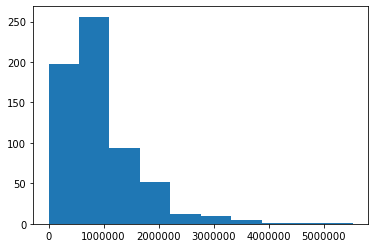

In [22]:
plt.hist(dfCasas["Price"])
plt.show()

In [23]:
dfCasas = dfCasas.query('Price<2500000')


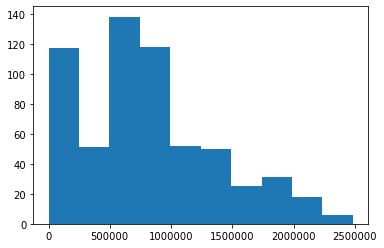

In [24]:
plt.hist(dfCasas["Price"])
plt.show()

In [25]:
dfCasas = dfCasas.query('Price>0')

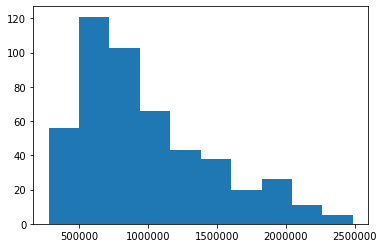

In [26]:
plt.hist(dfCasas["Price"])
plt.show()

#### Ahora la distribución se ve mucho mejor. 
Ahora estos datos los vamos a guardar en la base de datos y proceder con la generación de datos para poder tener nuestro dataset de BIG DATA :)
    
    

Volvemos a ver los mínimos

In [27]:
print("Min de los Datos")
dfCasas.min()

Min de los Datos


Rooms                1.0
Price           280000.0
Postcode          3018.0
Bedroom2             0.0
Bathroom             0.0
Landsize             0.0
BuildingArea         0.0
dtype: float64

Se eliminan los extremos en 0

In [28]:
dfCasas = dfCasas.query('Bedroom2>0')
dfCasas = dfCasas.query('Bathroom>0')
dfCasas = dfCasas.query('Landsize>0')
dfCasas = dfCasas.query('BuildingArea>0')

Volvemos a ver como queda la distribución de precios.

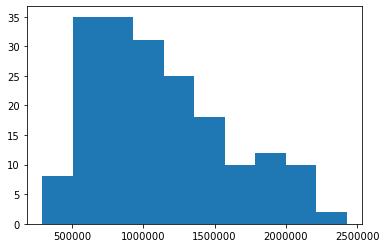

In [29]:
plt.hist(dfCasas["Price"])
plt.show()

Ahora que se han depurado los datos, vamos a guarda en Base de datos.

### PASO 4 - Guardado de datos en la BD

In [30]:
import findspark
findspark.init('C:/tools/Spark/spark-2.4.4-bin-hadoop2.7')
from pyspark.sql.types import *

In [31]:
import pyspark

from datetime import datetime
from pyspark.conf import SparkConf
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, date_format, udf 
from pyspark.sql.types import DateType



In [32]:
spark2 = SparkSession.builder \
    .appName("Basic JDBC pipeline") \
    .config("spark.driver.extraClassPath", "C:/tools/postgresql_jdbc/postgresql-42.2.9.jar") \
    .getOrCreate()

Vemos la estructura de los datos para crear el esquema.

In [33]:
dfCasas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 2 to 612
Data columns (total 7 columns):
Rooms           186 non-null int64
Price           186 non-null float64
Postcode        186 non-null int64
Bedroom2        186 non-null float64
Bathroom        186 non-null float64
Landsize        186 non-null float64
BuildingArea    186 non-null float64
dtypes: float64(5), int64(2)
memory usage: 11.6 KB


In [34]:
#Primero creo la estructura que tiene la tabla, por lo tanto debe ser la misma del dataframe

EsquemaTransacciones = StructType([ StructField("Rooms", IntegerType(), True), \
                        StructField("Price", FloatType(), True), \
                        StructField("Postcode", IntegerType(), True), \
                        StructField("Bedroom2", FloatType(), True), \
                        StructField("Bathroom", FloatType(), True), \
                        StructField("Landsize", FloatType(), True), \
                        StructField("BuildingArea", FloatType(), True)])



 
###### Script de la tabla  donde se incluirán los datos:
CREATE TABLE public.housemelbourneapp
(
    "Rooms" integer,
    "Price" real,
    "Postcode" integer,
    "Bedroom2" real,
    "Bathroom" real,
    "Landsize" real,
    "BuildingArea" real
)

In [35]:
#Crear la sesión
spark2 = SparkSession.builder.appName('AppProyecto').getOrCreate()

#Ahora se crea el dataframe basado en los datos que tenemos y el esquema que especificamos, el cual es identico al de la tabla.
DatosSpark = spark2.createDataFrame(dfCasas, schema=EsquemaTransacciones)

In [36]:
#Observamos los datos
DatosSpark.show()

+-----+---------+--------+--------+--------+--------+------------+
|Rooms|    Price|Postcode|Bedroom2|Bathroom|Landsize|BuildingArea|
+-----+---------+--------+--------+--------+--------+------------+
|    2|1035000.0|    3067|     2.0|     1.0|   156.0|        79.0|
|    4|1600000.0|    3067|     3.0|     1.0|   120.0|       142.0|
|    3|1876000.0|    3067|     4.0|     2.0|   245.0|       210.0|
|    2|1636000.0|    3067|     2.0|     1.0|   256.0|       107.0|
|    2|1097000.0|    3067|     3.0|     1.0|   220.0|        75.0|
|    3|1350000.0|    3067|     3.0|     2.0|   214.0|       190.0|
|    3| 840000.0|    3042|     3.0|     2.0|   303.0|       225.0|
|    4| 785000.0|    3042|     3.0|     1.0|   597.0|       127.0|
|    6| 725000.0|    3042|     6.0|     3.0|   976.0|       186.0|
|    2| 450000.0|    3042|     2.0|     1.0|   110.0|        90.0|
|    2| 515000.0|    3042|     2.0|     1.0|   141.0|        73.0|
|    2| 530000.0|    3042|     2.0|     1.0|   120.0|        9

Ahora guardaremos los datos.

In [37]:
DatosSpark.write.mode("overwrite") \
   .format("jdbc") \
    .option("url", "jdbc:postgresql://localhost/ProyectoBI") \
    .option("user", "postgres") \
    .option("password", "N@thalia19") \
    .option("dbtable", "housemelbourneApp") \
    .save()

Se verifica que los datos hayan sido incluidos, vamos a la base de datos y ejecutamos este script: 
 
 SELECT "Rooms", "Price", "Postcode", "Bedroom2", "Bathroom", "Landsize", "BuildingArea"
	FROM public.housemelbourneapp;



### NOTA IMPORTANTE
Dado que los datos no son suficientes para considerarse un BigData, se procedió con la generación de los mismos en la base de datos. El script desarrollado para este objetivo se muestra a continuación:

##### FUNCION random
-- FUNCTION: public.random_between(integer, integer)

-- DROP FUNCTION public.random_between(integer, integer);

CREATE OR REPLACE FUNCTION public.random_between(
	low integer,
	high integer)
    RETURNS integer
    LANGUAGE 'plpgsql'

    COST 100
    VOLATILE STRICT 
    
AS $BODY$
BEGIN
   RETURN floor(random()* (high-low + 1) + low);
END;
$BODY$;

ALTER FUNCTION public.random_between(integer, integer)
    OWNER TO postgres;
    
####    Generación de datos
DO $$
--Datos a explosionar
DECLARE
	rec_price RECORD;
	cur_price cursor for 
   		select *
  		  from housemelbourne3;
BEGIN
	DELETE FROM housemelbourne_ext;
	
	-- Open the cursor
   OPEN cur_price;
   
   LOOP
    -- fetch row into the pricePerRow
      FETCH cur_price INTO rec_price;
    -- exit when no more row to fetch
      EXIT WHEN NOT FOUND;
 	  FOR iter  IN 0..100 LOOP
	  		INSERT INTO public.housemelbourne_ext(rooms, price, postcode, bedroom2, bathroom, landsize, buildingarea)
		     	VALUES ( rec_price.rooms, random_between((rec_price.price - 50000)::int, (rec_price.price + 50000)::int), 
					     rec_price.postcode, rec_price.bedroom2, rec_price.bathroom, rec_price.landsize, rec_price.buildingarea);
	  END LOOP;
   END LOOP;
   -- Close the cursor
   CLOSE cur_price;
END $$;

SELECT * FROM housemelbourne_ext;



### PASO 5 - Carga de los datos de la BD

Ahora que ya tenemos datos en la base de datos, porque guardamos los depurados y luego generamos datos por medio del script creado, lo ejecutamos varias veces para obtener una cantidad considerable de datos.
Hicimos pruebas con: 

           18,786 registros
           37,572 registos
           450,864 registros
           Más de 2 millones de registros, pero no los pudo procesar :-)
           
Ahora empezamos a obtener datos.

In [117]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns #esta libreria no estaba instalada en el ambiente, por lo tanto se ejecuto conda install seaborn


In [118]:
import findspark
findspark.init('C:/tools/Spark/spark-2.4.4-bin-hadoop2.7')
from pyspark.sql.types import *

In [119]:
import pyspark

from datetime import datetime
from pyspark.conf import SparkConf
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, date_format, udf 
from pyspark.sql.types import DateType
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler



In [120]:
spark = SparkSession.builder \
    .appName("Basic JDBC pipeline") \
    .config("spark.driver.extraClassPath", "C:/tools/postgresql_jdbc/postgresql-42.2.9.jar") \
    .getOrCreate()

In [121]:
# Leemos los datos que se encuentran la tabla, por medio de  spark.
dfCasasBI = spark.read \
    .format("jdbc") \
    .option("url", "jdbc:postgresql://localhost/ProyectoBI") \
    .option("user", "postgres") \
    .option("password", "N@thalia19") \
    .option("dbtable", "housemelbourne_ext") \
    .load()  

In [122]:
dfCasasBI.show(20)

+-----+---------+--------+--------+--------+--------+------------+
|rooms|    price|postcode|bedroom2|bathroom|landsize|buildingarea|
+-----+---------+--------+--------+--------+--------+------------+
|  2.0|1120524.0|  3067.0|     2.0|     1.0|   156.0|        79.0|
|  2.0|1087790.0|  3067.0|     2.0|     1.0|   156.0|        79.0|
|  2.0|1027268.0|  3067.0|     2.0|     1.0|   156.0|        79.0|
|  2.0|1062885.0|  3067.0|     2.0|     1.0|   156.0|        79.0|
|  2.0|1045942.0|  3067.0|     2.0|     1.0|   156.0|        79.0|
|  2.0|1108238.0|  3067.0|     2.0|     1.0|   156.0|        79.0|
|  2.0|1040584.0|  3067.0|     2.0|     1.0|   156.0|        79.0|
|  2.0|1059672.0|  3067.0|     2.0|     1.0|   156.0|        79.0|
|  2.0|1035537.0|  3067.0|     2.0|     1.0|   156.0|        79.0|
|  2.0|1081886.0|  3067.0|     2.0|     1.0|   156.0|        79.0|
|  2.0|1098434.0|  3067.0|     2.0|     1.0|   156.0|        79.0|
|  2.0|1081706.0|  3067.0|     2.0|     1.0|   156.0|        7

In [123]:
#Observamos el dataframe
dfCasasBI.take(1)

[Row(rooms=2.0, price=1120524.0, postcode=3067.0, bedroom2=2.0, bathroom=1.0, landsize=156.0, buildingarea=79.0)]

In [124]:
#Ahora veamos la estructura de la los datos
print((dfCasasBI.count(), len(dfCasasBI.columns)))

(450864, 7)


In [164]:
#veamos detalles de los datos
dfCasasBI.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
rooms,450864,2.9301075268817205,0.8167983427320216,1.0,6.0
price,450864,1120168.2938180915,473476.53582505026,195276.0,2523496.0
postcode,450864,3066.3602150537636,57.328529810952084,3018.0,3206.0
bedroom2,450864,2.8870967741935485,0.8053226823029392,1.0,6.0
bathroom,450864,1.553763440860215,0.6220090809491274,1.0,3.0
landsize,450864,406.8763440860215,431.1869892037561,69.0,4290.0
buildingarea,450864,135.20967741935485,68.74320189643149,3.0,603.0


In [165]:
#importante que podamos observar la correlacción de los datos
import six
for i in dfCasasBI.columns:
    if not( isinstance(dfCasasBI.select(i).take(1)[0][0], six.string_types)):
        print( "Correlación del precio: ", i, dfCasasBI.stat.corr('price',i))
        

Correlación del precio:  rooms 0.4031698305723504
Correlación del precio:  price 1.0
Correlación del precio:  postcode 0.5966994378696925
Correlación del precio:  bedroom2 0.37188594935532054
Correlación del precio:  bathroom 0.3036719155115556
Correlación del precio:  landsize 0.022279475955121683
Correlación del precio:  buildingarea 0.3694650830851819


Para visualizar esta correlación de manera gráfica, vamos a usar un ejemplo que encontramos en towardsdatascience.com, que se ve muy bien la correlación de la diagonal (que siempre es 1) pero es más dificil poder observarla en las otras variables. 

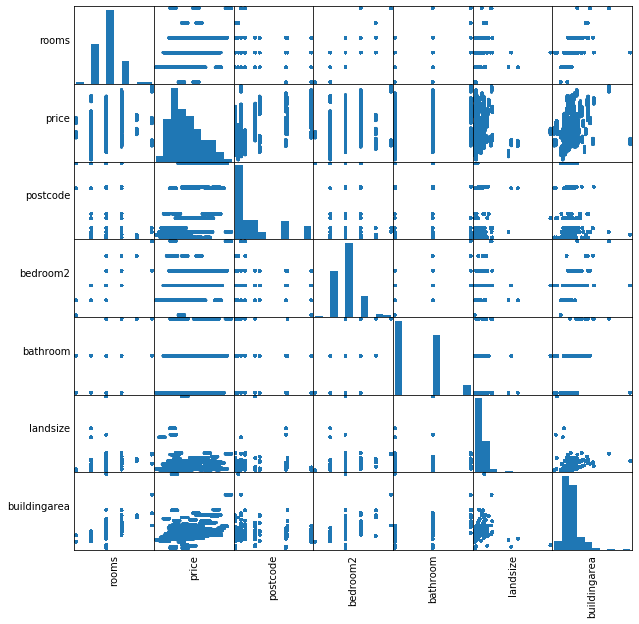

In [172]:
#graficación de la correlación.

numeric_features = [t[0] for t in dfCasasBI.dtypes if t[1] == 'int' or t[1] == 'float']
sampled_data = dfCasasBI.select(numeric_features).sample(False, 0.8).toPandas()
axs = pd.plotting.scatter_matrix(sampled_data, figsize=(10, 10))
n = len(sampled_data.columns)

for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

# Feature Engineering

Para los modelos que vamos a desarrollar, es necesario crear un solo vector con todos los features que vamos a utilizar: 
- rooms
- postcode
- bedroom2
- bathroom
- landsize
- buildingarea

A la salida que es la columna price se le asignará el nombre 'label'.

In [125]:
# Primer paso, ensamblar el vector
 
df_assembler = VectorAssembler(inputCols=['rooms','postcode','bedroom2', 'bathroom','landsize','buildingarea'], outputCol="features")
dfBI = df_assembler.transform(dfCasasBI)

In [126]:
dfBI = dfBI.withColumnRenamed('price', 'label')

In [127]:
dfBI.toPandas().head(10)

,rooms,label,postcode,bedroom2,bathroom,landsize,buildingarea,features
0,2.0,1120524.0,3067.0,2.0,1.0,156.0,79.0,"[2.0, 3067.0, 2.0, 1.0, 156.0, 79.0]"
1,2.0,1087790.0,3067.0,2.0,1.0,156.0,79.0,"[2.0, 3067.0, 2.0, 1.0, 156.0, 79.0]"
2,2.0,1027268.0,3067.0,2.0,1.0,156.0,79.0,"[2.0, 3067.0, 2.0, 1.0, 156.0, 79.0]"
3,2.0,1062885.0,3067.0,2.0,1.0,156.0,79.0,"[2.0, 3067.0, 2.0, 1.0, 156.0, 79.0]"
4,2.0,1045942.0,3067.0,2.0,1.0,156.0,79.0,"[2.0, 3067.0, 2.0, 1.0, 156.0, 79.0]"
5,2.0,1108238.0,3067.0,2.0,1.0,156.0,79.0,"[2.0, 3067.0, 2.0, 1.0, 156.0, 79.0]"
6,2.0,1040584.0,3067.0,2.0,1.0,156.0,79.0,"[2.0, 3067.0, 2.0, 1.0, 156.0, 79.0]"
7,2.0,1059672.0,3067.0,2.0,1.0,156.0,79.0,"[2.0, 3067.0, 2.0, 1.0, 156.0, 79.0]"
8,2.0,1035537.0,3067.0,2.0,1.0,156.0,79.0,"[2.0, 3067.0, 2.0, 1.0, 156.0, 79.0]"
9,2.0,1081886.0,3067.0,2.0,1.0,156.0,79.0,"[2.0, 3067.0, 2.0, 1.0, 156.0, 79.0]"


In [128]:

# visulizacion de vector ensamblado compuesto por features y label
dfBI.select(['features','label']).toPandas().head(10)

,features,label
0,"[2.0, 3067.0, 2.0, 1.0, 156.0, 79.0]",1120524.0
1,"[2.0, 3067.0, 2.0, 1.0, 156.0, 79.0]",1087790.0
2,"[2.0, 3067.0, 2.0, 1.0, 156.0, 79.0]",1027268.0
3,"[2.0, 3067.0, 2.0, 1.0, 156.0, 79.0]",1062885.0
4,"[2.0, 3067.0, 2.0, 1.0, 156.0, 79.0]",1045942.0
5,"[2.0, 3067.0, 2.0, 1.0, 156.0, 79.0]",1108238.0
6,"[2.0, 3067.0, 2.0, 1.0, 156.0, 79.0]",1040584.0
7,"[2.0, 3067.0, 2.0, 1.0, 156.0, 79.0]",1059672.0
8,"[2.0, 3067.0, 2.0, 1.0, 156.0, 79.0]",1035537.0
9,"[2.0, 3067.0, 2.0, 1.0, 156.0, 79.0]",1081886.0


# Training y testing 

Partimos a continuación el set de datos en 75% training y 25% testing:

In [129]:
# Particion del data set

model=dfBI.select(['features','label'])
train,test = model.randomSplit([0.75,0.25])

print(f"Size of train Dataset : {train.count()}" )
print(f"Size of test Dataset : {test.count()}" )

Size of train Dataset : 337818
Size of test Dataset : 113046


- Cuando teníamos con 18,786 registros, dividimos y los resultados fueron: 
Size of train Dataset : 14,104
Size of test Dataset : 4,682

- Cuando teníamos con 37,572 registros, dividimos y los resultados fueron: 
Size of train Dataset : 28,103
Size of test Dataset : 9,469

- Cuando teníamos con 450,864 registros, dividimos y los resultados fueron: 
Size of train Dataset : 337,818
Size of test Dataset : 113,046

In [305]:
train.describe().show()

+-------+------------------+
|summary|             label|
+-------+------------------+
|  count|            337818|
|   mean|1120123.6248512513|
| stddev|473749.52244940074|
|    min|          195276.0|
|    max|         2523496.0|
+-------+------------------+



In [306]:
test.describe().show()

+-------+------------------+
|summary|             label|
+-------+------------------+
|  count|            113046|
|   mean|1120301.7791341578|
| stddev| 472661.8918121409|
|    min|          195924.0|
|    max|         2516632.0|
+-------+------------------+



# MODELOS DE PREDICCIÓN
==============================================

# Modelo 1 - Regression
Para empezar la labor, trabajaremos con un regresor.

In [314]:
# Importación de libs y operaciones

from pyspark.ml.regression  import LinearRegression
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler

In [315]:
#crear el regresor
#lr = LinearRegression()
#lr = LinearRegression(featuresCol = 'features', labelCol='label', maxIter=10, regParam=0.3, elasticNetParam=0.8)
#lr = LinearRegression(featuresCol = 'features', labelCol='label', maxIter=100, regParam=0.3, elasticNetParam=0.8)
#lr = LinearRegression(featuresCol = 'features', labelCol='label', maxIter=500, regParam=0.3, elasticNetParam=0.8)
lr = LinearRegression(featuresCol = 'features', labelCol='label', maxIter=8000, regParam=0.3, elasticNetParam=0.8)
#corrida con  maxIter= 10 o  se mantiene
# maxIter=50, regParam=0.3, elasticNetParam=0.8)

In [316]:

# Fit the model, le llamamos lr_model
lr_model=lr.fit(train)

#### PREDICCIÓN:  
Creamos el dataframe de prediciones (predictions_df) a partir del modelo de entrenamiento y el conjunto de datos test:

In [317]:
predictions_df = lr_model.transform(test)

Visualizamos el contenido de predictions_df:

In [318]:
# visulización de predictions_df

predictions_df.toPandas().head(10)

,features,label,prediction
0,"[1.0, 3143.0, 2.0, 2.0, 144.0, 107.0]",1339772.0,1.180909e+06
1,"[1.0, 3143.0, 2.0, 2.0, 144.0, 107.0]",1341020.0,1.180909e+06
2,"[1.0, 3143.0, 2.0, 2.0, 144.0, 107.0]",1341171.0,1.180909e+06
3,"[1.0, 3143.0, 2.0, 2.0, 144.0, 107.0]",1347815.0,1.180909e+06
4,"[1.0, 3143.0, 2.0, 2.0, 144.0, 107.0]",1347921.0,1.180909e+06
5,"[1.0, 3143.0, 2.0, 2.0, 144.0, 107.0]",1354074.0,1.180909e+06
6,"[1.0, 3143.0, 2.0, 2.0, 144.0, 107.0]",1354195.0,1.180909e+06
7,"[1.0, 3143.0, 2.0, 2.0, 144.0, 107.0]",1355764.0,1.180909e+06
8,"[1.0, 3143.0, 2.0, 2.0, 144.0, 107.0]",1356962.0,1.180909e+06
9,"[1.0, 3143.0, 2.0, 2.0, 144.0, 107.0]",1358911.0,1.180909e+06


#### Evaluación del modelo

In [319]:
# Evaluación del modelo 

model_predictions = lr_model.evaluate(test)

In [320]:
# Revisar el valor de R2

print(f"R2 : {model_predictions.r2}" )

R2 : 0.6138572906469473


- Para la corrida con 18,786 registros , obtuvimos un R2 : 0.6211101583172045
- Para la corrida con 37,572 registros, obtuvimos un R2: 0.6178271413206842
- Para la corrida con 450,864 registros, obtuvimos un R2: 0.6138572888606741 
- Para la corrida con 450,864 registros, obtuvimos un R2: 0.6138572906469473 (con los hiperparámetros modificados)

Con estas evaluaciones, podemos ver que este modelo no tiene mayor variación a la cantidad de datos que usamos.

In [284]:
# Revisamos el valor del meanSquaredError

print(f"El Mean Squared Error es : {model_predictions.rootMeanSquaredError}" )

El Mean Squared Error es : 293705.6888405466


- Para la corrida con 18,786 registros, obtuvimos Mean Squared Error : 290205.2997134548
- Para la corrida con 37,572 registros, obtuvimos Mean Squared Error: 289724.4608475018
- Para la corrida con 450,864  registros, obtuvimos Mean Squared Error: 293712.60742746794

Igual que la evaluación anterior, la cantidad de datos que usemos no impactan significativamente sobre los resultados.

Deberíamos de continuar con el siguiente nivel de modelo, que es el árbol de decisión, pero vamos a continuar con el RandomForest.

# Modelo 2 -   DecisionTreeRegressor

In [324]:
from pyspark.ml import Pipeline
from pyspark.ml.regression import DecisionTreeRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.feature import VectorAssembler
 

In [325]:
# Aunque este proceso de vectorizar los datos ya se hizo previamente, para este desarrollo lo volveremos hacer
 
vectorizer = VectorAssembler()
vectorizer.setInputCols(["rooms", "postcode", "bedroom2", "bathroom", "landsize", "buildingarea"])
vectorizer.setOutputCol("features")

VectorAssembler_3f9561def71a

Hicimos algunos cambios respecto al modelo de la tarea anterior, porque nos gustó como realiza la subida de datos a la caché, entonces para dejar el funcionamiento separado de los otros modelos, generamos vectores, datos de test y training diferentes

In [326]:
#El ejemplo indicaba que se requería una semilla, así que no la modificamos. 
seed = 1800009193

In [327]:
# Generar un grupo de entrenamiento y otro de prueba con una proporción 80-20
(DatosTest, DatosTrain) = dfCasasBI.randomSplit([.2, .8], seed=seed)

In [328]:
# Esta parte resulto intresante, subir los datos a caché 
DatosTestCache = DatosTest.cache()
DatosTrainCache = DatosTrain.cache()

In [329]:
# Creaoms el ábrol de regresión  
dtree = DecisionTreeRegressor()

In [330]:
# Definir los parametros del modelo:
# - Predicted_PE: columna que almacenará las predicciones estimadas
# - 5 niveles de profundidad
dtree.setPredictionCol("Predicted_PE").setMaxBins(100).setFeaturesCol("features").setLabelCol("price").setMaxDepth(5)

DecisionTreeRegressor_ab16d81e694b

In [331]:
# Crear una 'pipeline' en la cual hay 2 elementos, un 'Vector Assembler' y un modelo 'Decision Tree', accesibles mediante el atributo 'stages'.
pipeline = Pipeline(stages=[vectorizer, dtree])

In [332]:
# ENTRENAMOS EL MODELO!
model = pipeline.fit(DatosTrainCache)

In [333]:
# VISUALIZAMOS LOS DATOS

vectAssembler = model.stages[0]
dtModel = model.stages[1]
print("Nodos: " + str(dtModel.numNodes))
print("Profundidad: "+ str(dtModel.depth)) # resumen
print(dtModel.toDebugString)

Nodos: 61
Profundidad: 5
DecisionTreeRegressionModel (uid=DecisionTreeRegressor_ab16d81e694b) of depth 5 with 61 nodes
  If (feature 1 <= 3054.5)
   If (feature 5 <= 137.5)
    If (feature 2 <= 2.5)
     If (feature 5 <= 95.0)
      If (feature 5 <= 70.5)
       Predict: 399505.5525366984
      Else (feature 5 > 70.5)
       Predict: 589472.5366742479
     Else (feature 5 > 95.0)
      If (feature 1 <= 3037.0)
       Predict: 820674.7419473452
      Else (feature 1 > 3037.0)
       Predict: 604170.647405865
    Else (feature 2 > 2.5)
     If (feature 4 <= 276.5)
      If (feature 3 <= 1.5)
       Predict: 864252.3859223301
      Else (feature 3 > 1.5)
       Predict: 669020.0881716708
     Else (feature 4 > 276.5)
      If (feature 5 <= 40.5)
       Predict: 1336372.346605411
      Else (feature 5 > 40.5)
       Predict: 868065.4487986505
   Else (feature 5 > 137.5)
    If (feature 4 <= 410.5)
     If (feature 1 <= 3028.5)
      If (feature 4 <= 316.5)
       Predict: 718958.4362820513

In [334]:
#PREDICCION
predictionsTD = model.transform(DatosTestCache)
display(predictionsTD)

DataFrame[rooms: float, price: float, postcode: float, bedroom2: float, bathroom: float, landsize: float, buildingarea: float, features: vector, Predicted_PE: double]

##### Evaluar el modelo

In [335]:
# Evaluación mediante el método de regresión
regEval = RegressionEvaluator(predictionCol="Predicted_PE", labelCol="price", metricName="rmse")

In [336]:
# Evaluación 1 - RMSE:  Error cuadrático medio
rmse = regEval.evaluate(predictions)
print(" Error cuadrático medio (RMSE): %.2f" % rmse)

 Error cuadrático medio (RMSE): 72318.78


In [337]:
# Evaluación 2 - r2: Coeficiente de determinación
r2 = regEval.evaluate(predictions, {regEval.metricName: "r2"})
print("Evaluación de R2: {0:.2f}".format(r2))

Evaluación de R2: 0.98


Profundidad de 8 nodos:   Evaluación de R2: 0.98

# Modelo 3 -  RandomForestRegressor

In [138]:
# import lib
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

In [139]:
# Crear el regresor usando la columna features que se creo previamente
rf = RandomForestRegressor(featuresCol="features")

In [140]:
# Ahora se entrena el modelo
rf_model = rf.fit(train)

In [141]:
# revisemos los featureImportances: 
rf_model.featureImportances

SparseVector(6, {0: 0.0795, 1: 0.5123, 2: 0.0709, 3: 0.0352, 4: 0.0767, 5: 0.2253})

#### Evaluación del modelo

In [142]:
#Evaluamos el modelo con los datos de entrenamiento:
model_predictions = rf_model.transform(test)

In [143]:
# Ahora generamos el model_predictions
model_predictions = rf_model.transform(test)

In [144]:
#Desplegamos los valores del model_predictions
model_predictions.show(10)

+--------------------+---------+-----------------+
|            features|    label|       prediction|
+--------------------+---------+-----------------+
|[1.0,3143.0,2.0,2...|1339772.0|1302291.082765965|
|[1.0,3143.0,2.0,2...|1341020.0|1302291.082765965|
|[1.0,3143.0,2.0,2...|1341171.0|1302291.082765965|
|[1.0,3143.0,2.0,2...|1347815.0|1302291.082765965|
|[1.0,3143.0,2.0,2...|1347921.0|1302291.082765965|
|[1.0,3143.0,2.0,2...|1354074.0|1302291.082765965|
|[1.0,3143.0,2.0,2...|1354195.0|1302291.082765965|
|[1.0,3143.0,2.0,2...|1355764.0|1302291.082765965|
|[1.0,3143.0,2.0,2...|1356962.0|1302291.082765965|
|[1.0,3143.0,2.0,2...|1358911.0|1302291.082765965|
+--------------------+---------+-----------------+
only showing top 10 rows



In [145]:
# Ahora viene el momento de evaluar el modelo con R2 y RSME

dt_evaluator_r2 = RegressionEvaluator(metricName='r2')

dt_r2 = dt_evaluator_r2.evaluate(model_predictions)
print(f'El valor de R2 del  DecisionTreeRegressor es {dt_r2}')

# RMSE value of the model on test data 

dt_evaluator_rmse = RegressionEvaluator(metricName='rmse')
dt_rmse = dt_evaluator_rmse.evaluate(model_predictions)
print(f'El error cuadrático (RMSE) para el DecisionTreeRegressor es  {dt_rmse}')

El valor de R2 del  DecisionTreeRegressor es 0.8518170371129592
El error cuadrático (RMSE) para el DecisionTreeRegressor es  181948.2174201171


- Para la corrida con 37,572 registros, obtuvimos 

        El valor de R2 del  DecisionTreeRegressor es 0.8440727311594602
        El error cuadrático (RMSE) para el DecisionTreeRegressor es  186170.0838757196


- Para la corrida con 450,864  registros, obtuvimos:

       El valor de R2 del  DecisionTreeRegressor es 0.8518170371129592
       El error cuadrático (RMSE) para el DecisionTreeRegressor es  181948.2174201171


In [146]:
dfBI.take(1)

[Row(rooms=2.0, label=1120524.0, postcode=3067.0, bedroom2=2.0, bathroom=1.0, landsize=156.0, buildingarea=79.0, features=DenseVector([2.0, 3067.0, 2.0, 1.0, 156.0, 79.0]))]

# Modelo 4 -  Gradient-boosted tree regression

Vamos a utilizar este modelo, para ver si se obtienen mejores resultados, podemos observar que de la regresión lineal al RandomForest mejoró bastante.

In [350]:
dfBI.head(5)

[Row(rooms=2.0, label=1120524.0, postcode=3067.0, bedroom2=2.0, bathroom=1.0, landsize=156.0, buildingarea=79.0, features=DenseVector([2.0, 3067.0, 2.0, 1.0, 156.0, 79.0])),
 Row(rooms=2.0, label=1087790.0, postcode=3067.0, bedroom2=2.0, bathroom=1.0, landsize=156.0, buildingarea=79.0, features=DenseVector([2.0, 3067.0, 2.0, 1.0, 156.0, 79.0])),
 Row(rooms=2.0, label=1027268.0, postcode=3067.0, bedroom2=2.0, bathroom=1.0, landsize=156.0, buildingarea=79.0, features=DenseVector([2.0, 3067.0, 2.0, 1.0, 156.0, 79.0])),
 Row(rooms=2.0, label=1062885.0, postcode=3067.0, bedroom2=2.0, bathroom=1.0, landsize=156.0, buildingarea=79.0, features=DenseVector([2.0, 3067.0, 2.0, 1.0, 156.0, 79.0])),
 Row(rooms=2.0, label=1045942.0, postcode=3067.0, bedroom2=2.0, bathroom=1.0, landsize=156.0, buildingarea=79.0, features=DenseVector([2.0, 3067.0, 2.0, 1.0, 156.0, 79.0]))]

In [351]:
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline

In [352]:
#pasamos los datos que leímos de la tabla a la variable data.
data =  dfBI

# Con esta instrucción se identifican automáticamente características categóricas y las indexa.
# Se setea maxCategories para que las entidades con más de 4 valores distintos se traten como continuas.
featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(data)

# Se dividen los datos en testing y training, para este caso será 70% para traingin y 30% para test  
(trainingData, testData) = data.randomSplit([0.7, 0.3])

# Ahora se entrena el modelo.
gbt = GBTRegressor(featuresCol="indexedFeatures", maxIter=10)

# Ahora se utiliza el indexador de características para crear el pipeline 
pipeline = Pipeline(stages=[featureIndexer, gbt])



In [353]:
# ENTRENAMOS EL MODELO!  
modelGD = pipeline.fit(trainingData)



In [354]:
# EJECUTAMOS LAS PREDICCIONES.
predictionsGD = modelGD.transform(testData)

# Ahora desplegamos 10 para ver como han quedado
predictionsGD.select("prediction", "label", "features").show(10)



+-----------------+--------+--------------------+
|       prediction|   label|            features|
+-----------------+--------+--------------------+
|989792.9249696371|887474.0|[1.0,3206.0,1.0,1...|
|989792.9249696371|888353.0|[1.0,3206.0,1.0,1...|
|989792.9249696371|889421.0|[1.0,3206.0,1.0,1...|
|989792.9249696371|893008.0|[1.0,3206.0,1.0,1...|
|989792.9249696371|893028.0|[1.0,3206.0,1.0,1...|
|989792.9249696371|893721.0|[1.0,3206.0,1.0,1...|
|989792.9249696371|896435.0|[1.0,3206.0,1.0,1...|
|989792.9249696371|898424.0|[1.0,3206.0,1.0,1...|
|989792.9249696371|899079.0|[1.0,3206.0,1.0,1...|
|989792.9249696371|900314.0|[1.0,3206.0,1.0,1...|
+-----------------+--------+--------------------+
only showing top 10 rows



In [355]:
# Evaluamos el modelo, utilizamos la métrica RMSE
evaluatorGD = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")

In [356]:
#obtenemos el RMSE
rmse = evaluatorGD.evaluate(predictionsGD)
print("El Root Mean Squared Error (RMSE) del test es =  ", rmse)

El Root Mean Squared Error (RMSE) del test es =   107443.8157866748


- Para la corrida del test  con 18,786  registros, obtuvimos Root Mean Squared Error (RMSE)  =   110507.03332986399
- Para la corrida del test  con 37,572  registros, obtuvimos Root Mean Squared Error (RMSE)  =   115109.83325552654
- Para la corrida del test  con 18,786  registros, obtuvimos Root Mean Squared Error (RMSE)  =   108795.01668075653


In [357]:
gbtModel = modelGD.stages[1]
print(gbtModel)  # summary only

GBTRegressionModel (uid=GBTRegressor_30becafef67d) with 10 trees


- Para la corrida con 18,786  registros, obtuvimos :
       
       GBTRegressionModel (uid=GBTRegressor_abc31967eebb) with 10 trees 

- Para la corrida con 37,572 registros, obtuvimos  :  
        
       GBTRegressionModel (uid=GBTRegressor_3fece2408175) with 10 trees
      

# CONCLUSIONES

#### Datos

Obtener los datos fue un trabajo que nos tomó varias semanas, dado que ninguna de nosotros tenía acceso a datos de trabajo, buscamos de los disponibles en la web. Al inicio de este notebook se explica.  

#### Modelos y su evaluación


Modelos y su evaluación

Modelo 1 - Regression:  
 - Score R2: 0.61
 - Con este modelo lo interesante fue que la cantidad de datos utilizados no dieron mayor variación a los resultados, todos rondaron los 0.6
 - Hicimos varias pruebas modificando parámetros, con las corrida de datos de 450,864  y no vario el resultado.
Por lo tanto concluímos que este no es un buen modelo para resolver nuestro problema. 

Modelo 2 - DecisionTreeRegressor:
- Score R2: 0.98 
- Hicimos uso de la carga de datos en caché para el procesamiento. 
- La variación de la cantidad de nodos en 5, 7 y 8 no tuvo impacto en el score, por eso la dejamos con 5 nodos. 
- 
Modelo 3 - RandomForestRegressor
- Score R2: 0.85
- En la ejecución de este modelo nos límitamos bastante a lo realizado en clase. 
- Las corridas para las diferentes cantidades de datos no tuvieron gran impacto en el score.



### CONCLUSION FINAL
Mejor modelo para nuestro trabajo el Modelo 2 - DecisionTreeRegressor
 
